# TD - Introduction à Numpy & Matplotlib 

L'objectif de ce TD est de se familiariser avec les principales librairies numériques de Python, à savoir [numpy](https://docs.scipy.org/doc/numpy/reference/), [scipy](https://docs.scipy.org/doc/scipy/reference/) et [matplotlib](http://www.matplotlib.org). 

Vous importerez ces bibliothèques avec les instructions suivantes:

**À FAIRE:** histogrammes, visu. 2D, et visu. données complexes (p.ex. https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalTemperatures.csv)

In [1]:
%matplotlib inline

import numpy as N
import scipy.stats as SS
import matplotlib.pyplot as P

## Rappels matplotlib

La fonction de haut niveau `P.subplots` permet de générer, dans son utilisation la plus simple, une figure (`fig`) et un 
système d'axe (`ax`):

```python
fig, ax = P.subplots(1, 1)  # Figure à 1×1=1 syst. d'axes
```

* `fig` est un objet de type `Figure` contenant un (ou plusieurs) système(s) d'axes, et pouvant être affiché ou sauvegardé (p.ex. au format PDF ou PNG);
* `ax` est un objet de type `Axes` disposant de nombreuses méthodes de visualisation (`plot`, `scatter`, `imshow`, `hist`, etc.), et de personalisation (`xlabel`, `xscale`, `title`, `legend`, `grid`, etc.).
  
  <img src="https://matplotlib.org/_images/anatomy.png" alt="Anatomie d'une figure." width="400">

## Tracé de courbes (1D)

### Sinc

* Générer un vecteur $x$ de 100 points entre 0 et $2\pi$ (`numpy.linspace`)
* Génerer le vecteur $y = \sin_c(x)$ (`numpy.sinc`)

In [2]:
x = N.linspace(0, 2 * N.pi, 100)
y = N.sinc(x)

* Dans une figure à un système d'axe, tracer conjointement $y(x)$ et $y^2(x)$.
* Agrémenter la figure pour la rendre compréhensible (titre de la figure et des axes, légende).

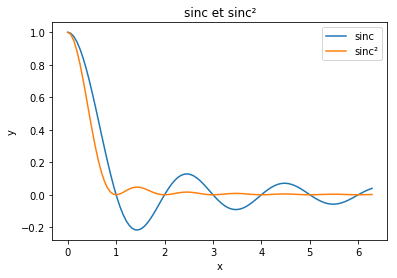

In [3]:
fig, ax = P.subplots(1, 1)
ax.plot(x, y, label='sinc')
ax.plot(x, y**2, label='sinc²')
ax.set(title='sinc et sinc²', xlabel='x', ylabel='y')
ax.legend()

### Trèfles de Habenicht

* Générer un vecteur $\theta$ de 100 points entre 0 et $2\pi$.
* Génerer le tableau 2D (de format $(3, 100)$) $r_n = 1 + \cos n\theta + \sin^2 n\theta$ pour $n = 3, 5, 7$.

In [4]:
theta = N.linspace(0, 2 * N.pi, 100)

rn = N.array([ 1 + N.cos(n * theta) + N.sin(n * theta) ** 2 for n in (3, 5, 7) ])
print(rn.shape)

(3, 100)


Pour tracer une courbe en coordonnées polaires, il faut un système d'axes adapté:

```python
fig = P.figure()                                   # Création de la figure seule
ax = fig.add_subplot(1, 1, 1, projection='polar')  # Ajout d'un syst. d'axes en polaire
```

* Tracer dans un même système d'axes les différentes courbes polaires $r_{n=3,5,7}(\theta)$.

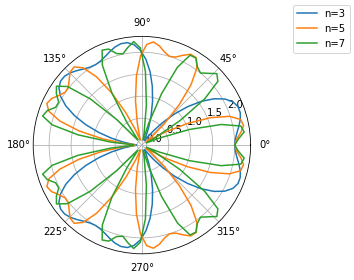

In [5]:
fig = P.figure()
ax = fig.add_subplot(1, 1, 1, projection='polar')
ax.plot(theta, rn[0], label='n=3')
ax.plot(theta, rn[1], label='n=5')
ax.plot(theta, rn[2], label='n=7')
fig.legend()

### Filtre passe-haut

Nous voulons étudier le filtre passe-haut du 2e ordre dont la fonction de transfert complexe est:
$$
H_Q(x) = \frac{-x^2}{1 - x^2 + i x/Q}
$$
où $x = \omega/\omega_0$ est la pulsation réduite, et $Q>0$ le facteur de qualité.

* Définir une fonction `H(x, Q=1)` retournant la fonction de transfert complexe précédent.
* Définir une fonction `gain_dB(h)` retournant le gain en dB de la fonction de transfert complexe `h`: $G_{dB} = 20\log_{10} |h|$.  Pour la phase, utiliser directement la fonction `numpy.angle`.

In [6]:
def H(x, Q=1):
    """
    Fonction de transfert complexe d'un filtre passe-haut du 2e ordre.
    
    x: pulsation réduite
    Q: facteur de qualité
    """
    
    return -x**2 / (1 - x**2 + 1j * x / Q)

def gain_dB(h):
    "Gain en dB."
    
    return 20 * N.log10(N.abs(h))

* Générer un vecteur 𝑥 de 100 points disposés logarithmiquement entre 0.1 et 10 (`numpy.logspace`).
* Tracer dans 2 systèmes d'axes superposés (`subplots(2, 1)`) le gain (en dB) et la phase (en rad.) du filtre $H_Q(x)$ pour $Q=1/5$, $Q=1$ et $Q=5$.

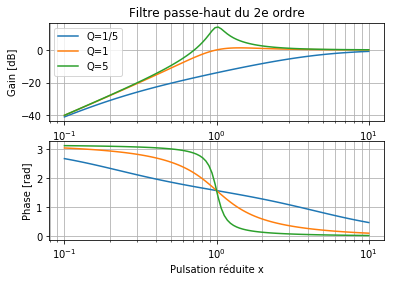

In [7]:
x = N.logspace(-1, 1, 100)

fig, (ax1, ax2) = P.subplots(2, 1)

# Gain [dB]
ax1.plot(x, gain_dB(H(x, Q=0.2)), label='Q=1/5')
ax1.plot(x, gain_dB(H(x, Q=1)), label='Q=1')
ax1.plot(x, gain_dB(H(x, Q=5)), label='Q=5')

# Phase [rad]
ax2.plot(x, N.angle(H(x, Q=0.2)))
ax2.plot(x, N.angle(H(x, Q=1)))
ax2.plot(x, N.angle(H(x, Q=5)))

ax1.set(ylabel='Gain [dB]', xscale='log', title='Filtre passe-haut du 2e ordre')
ax2.set(xlabel='Pulsation réduite x', ylabel='Phase [rad]', xscale='log')
ax1.legend()
ax1.grid(which='both')
ax2.grid(which='both')

## Le quartet d'Anscombe

Nous allons charger et étudier 4 jeux de données $(x, y)$, d'abord en calculant des statistiques descriptives (moyennes, écarts type, etc.) puis en les visualisant.

* Utiliser la fonction `numpy.loadtxt` pour charger les données du fichier `anscombe.dat`. Quel format (*shape*) a le tableau de retour?

In [8]:
data = N.loadtxt('anscombe.dat')
print(data.shape)

(11, 8)


* Transformer le tableau précédent en 4 jeux de données `j1`, `j2`, `j3` et `j4` de format $(11, 2)$.

In [9]:
j1, j2, j3, j4 = data[:, 0:2], data[:, 2:4], data[:, 4:6], data[:, 6:8]
print(j1.shape)

(11, 2)


* Pour chacun des 4 jeux de données, calculer et afficher (avec 2 chiffres après la virgule) les statistiques suivantes:
  - les moyennes de $x$ et $y$ (`numpy.mean`),
  - les écarts-type de $x$ et $y$ (`numpy.std`),
  - le coefficient de corrélation entre $x$ et $y$ (`scipy.stats.pearsonr`),
  - l'équation de la droite de régression linéaire $y = ax + b$ (`scipy.stats.linregress`).
  
  Que constatez-vous? Que pouvez-vous en déduire?

In [10]:
for i, ji in enumerate([j1, j2, j3, j4], start=1):
    print(" Jeu #{} ".format(i).center(34, '='))
    x, y = ji.T
    print("Moyennes:           x={:.2f}, y={:.2f}".format(N.mean(x), N.mean(y)))
    print("Écarts-type:        x={:.2f}, y={:.2f}".format(N.std(x), N.std(y)))
    r, _ = SS.pearsonr(x, y)
    print("Coeff. corrélation: r={:.2f}".format(r))
    # slope, intercept, r_value, p_value, std_err
    a, b, _, _, _ = SS.linregress(x, y)
    print("Rég. linéaire:      a={:.2f}, b={:.2f}".format(a, b))

============= Jeu #1 =============
Moyennes:           x=9.00, y=7.50
Écarts-type:        x=3.16, y=1.94
Coeff. corrélation: r=0.82
Rég. linéaire:      a=0.50, b=3.00
============= Jeu #2 =============
Moyennes:           x=9.00, y=7.50
Écarts-type:        x=3.16, y=1.94
Coeff. corrélation: r=0.82
Rég. linéaire:      a=0.50, b=3.00
============= Jeu #3 =============
Moyennes:           x=9.00, y=7.50
Écarts-type:        x=3.16, y=1.94
Coeff. corrélation: r=0.82
Rég. linéaire:      a=0.50, b=3.00
============= Jeu #4 =============
Moyennes:           x=9.00, y=7.50
Écarts-type:        x=3.16, y=1.94
Coeff. corrélation: r=0.82
Rég. linéaire:      a=0.50, b=3.00


* Au sein d'une même figure (`subplots(2, 2)`), tracer les 4 jeux de données $(x_i,y_i)$ (`plot(x, y, 'bo')`), en y ajoutant à chaque fois la droite de régression linéaire (`plot(x, a*x+b, 'r-')`). 

  Que conclure?

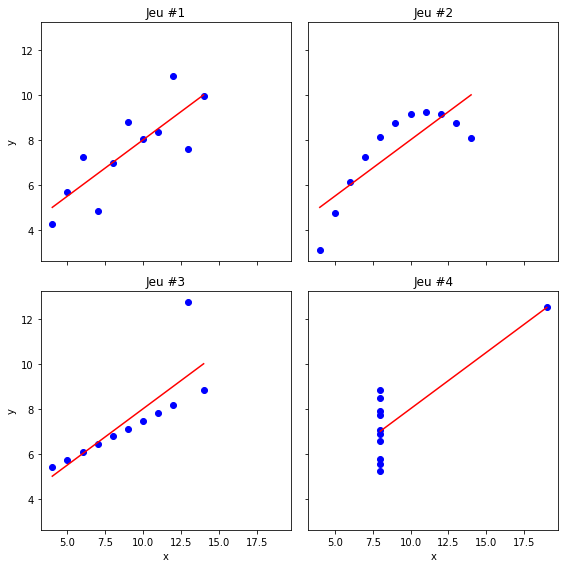

In [11]:
fig, axs = P.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)  # retourne un tableau axs de format (2, 2)

for i, ji in enumerate([j1, j2, j3, j4]):
    x, y = ji.T
    a, b, _, _, _ = SS.linregress(x, y)
    xx = N.array([x.min(), x.max()])
    
    axs[i//2, i%2].plot(x, y, 'bo')
    axs[i//2, i%2].plot(xx, a*xx + b, 'r-')
    axs[i//2, i%2].set(title="Jeu #{}".format(i + 1))

[ ax.set(xlabel='x') for ax in axs[1] ]
[ ax.set(ylabel='y') for ax in axs[:, 0] ]
fig.tight_layout()